In [54]:
import matplotlib.pyplot as plt
import pandas as pd

from astropy.coordinates import SkyCoord, EarthLocation, Angle
from astropy.time import Time
import astropy.units as u
from astroplan import Observer, FixedTarget, is_observable
from astroplan import AtNightConstraint, AltitudeConstraint
from astroplan.plots import plot_airmass

Define observational site (Calar Alto Observatory, Spain)

In [82]:
CAHA = Observer(longitude=Angle('-2d32.8m'), latitude=Angle('37d13.4m'),
                elevation=2168*u.m, name="CAHA", timezone="Europe/Madrid")
CAHA

<Observer: name='CAHA',
    location (lon, lat, el)=(-2.546666666666667 deg, 37.22333333333333 deg, 2167.9999999999727 m),
    timezone=<DstTzInfo 'Europe/Madrid' LMT-1 day, 23:45:00 STD>>

Test by cross-checking with StarAlt. Define a fixed target and plot its airmass.

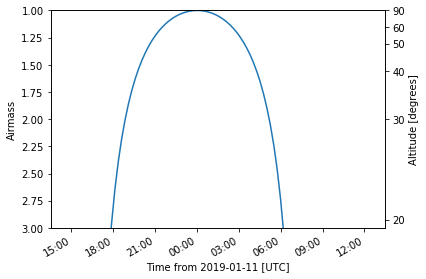

In [83]:
coord2MUCD20263 = SkyCoord("7h14m03.94s", "+37d02m46.0s", 
                           unit=(u.hourangle, u.deg))
t = FixedTarget(coord=coord2MUCD20263, name='2MUCD20263')

plot_airmass(t, CAHA, time=Time('2019-01-12 1:30:00'), altitude_yaxis=True)
# plt.ylim([2.0, 1.0])

Define constraints regarding nighttime, minimum elevation, time period, etc.

In [84]:
constraints = [AtNightConstraint.twilight_astronomical(),
               AltitudeConstraint(min=30 * u.deg)]
start_time = Time('2019-01-15 00:00')
end_time = Time('2020-01-01 06:00')

Check if the target is observable from CAHA given the observational constraints

In [85]:
is_observable(AltitudeConstraint(min=30 * u.deg), observer=CAHA,
              targets=t, time_range=[start_time, end_time])

array([ True])